# **Analyzing the NYC Airbnb Market Using Python**

#### Dataset Description

- **Id** : Unique for each Propety Listing.
- **name** : Name of the each Propety Listing.
- **host_id** : Unique ID for host who have listed the property on Airbnb.
- **host_name** : Name of host
- **neighbourhood_group** : Name of Each boroughs of NYC, Manhattan, Brooklyn,Queens,Bronx, State Island.
- **neighbourhood** : Area in each borough of NYC
- **latitude, longitude** : Co-ordinates of each listed property
- **room_type** : Differnt types of room available for listing , Private room,Entire home/apt,Shared room.
- **price** : Price of listing.
- **minimum_nigths** : Mandatory number of nights to be booked for available for each type of property.
- **number_of_review** : Number of reviews for each Listed property
- **last_review** : Date on whcih last time the listing was reviewed
- **review_per_month** : Number of reviews per month
- **calculated_host_listings_count** : Number of listing each host owns
- **availablity_365** : Number of days the given listing is available for booking

In [165]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [166]:
df = pd.read_csv(r"E:\Python-Data-Cleaning-FE-and-EDA-Projects\Airbnb NYC 2019 Market Analysis\Airbnb NYC 2019.csv")

data = df.copy()

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [167]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [169]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [170]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [171]:
data.duplicated().sum()

np.int64(0)

In [172]:
# Dropping Unnecessary Columns

data.drop(['id', 'last_review'], axis = 1, inplace = True)

In [173]:
# Separate Numerical columns and Categorical Columns

numerical_columns = [col for col in data if data[col].dtypes != 'O']

categorical_columns = [col for col in data if data[col].dtypes == 'O']

In [174]:
data[numerical_columns].dtypes

host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [175]:
data[categorical_columns].dtypes

name                   object
host_name              object
neighbourhood_group    object
neighbourhood          object
room_type              object
dtype: object

### **Handling Missing Values**

In [176]:
# Replacing the null values with appropriate values
data['host_name'].replace(np.nan, 'other', inplace = True)
data['reviews_per_month'].replace(np.nan, '0', inplace = True)

In [177]:
data.isnull().sum()

name                              16
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### **Exploratory Data Analysis**

#### Que1: Which are the top 10 host_id with the highest number of property listings?

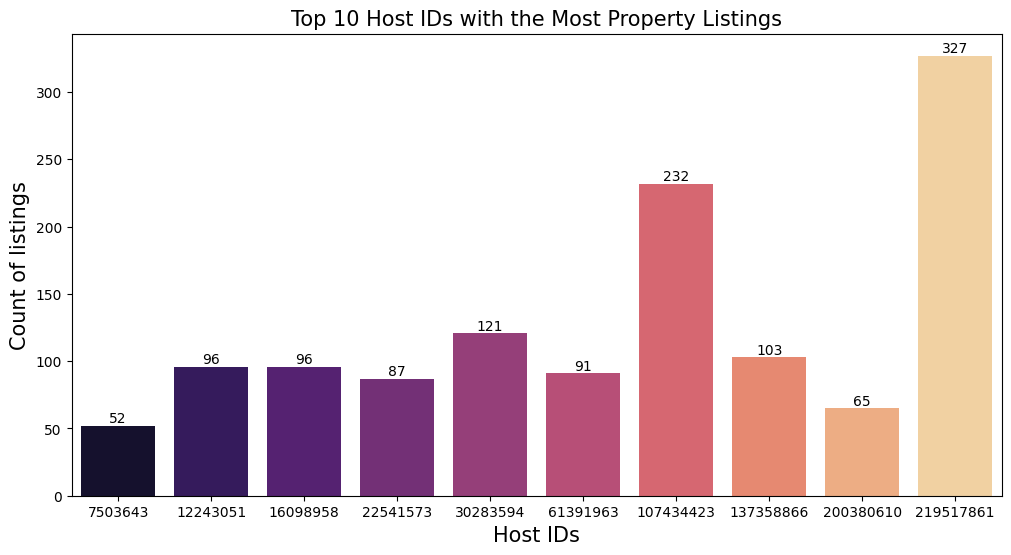

In [178]:
data['host_id'].value_counts().reset_index().head(10)

# Plotting the bar graph to visualize the top 10 host ids with the highest number of property listings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=data['host_id'].value_counts().iloc[:10].index, y=data['host_id'].value_counts().iloc[:10].values, palette="magma")

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Top 10 Host IDs with the Most Property Listings", fontsize=15)
plt.xlabel("Host IDs", fontsize=15)
plt.ylabel("Count of listings", fontsize=15)
plt.show()

#### Que2: What are the top 10 neighborhoods with the most property listings?

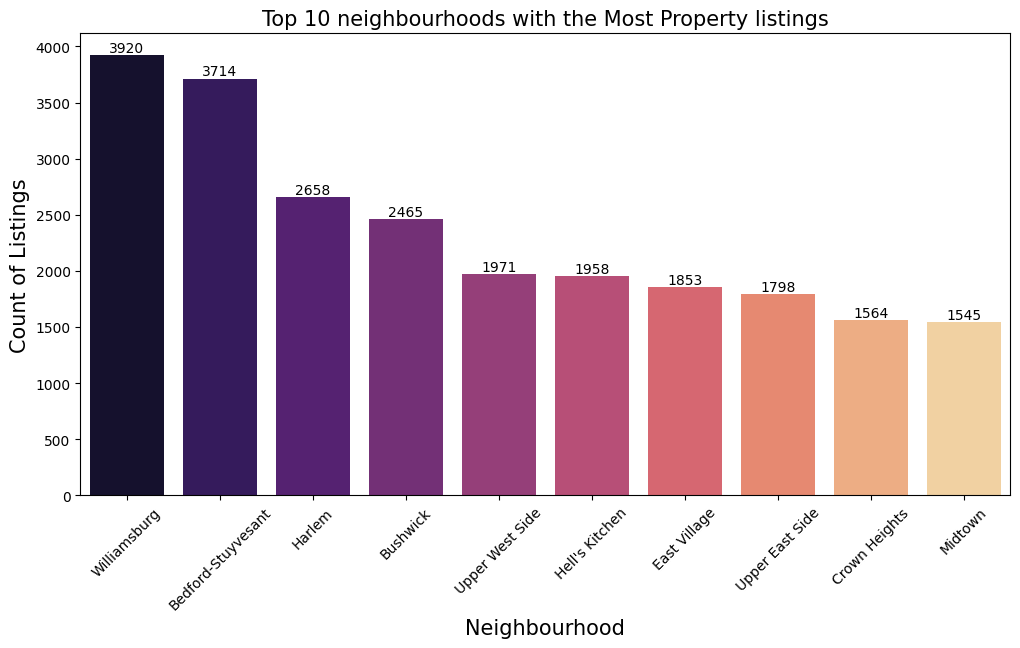

In [179]:
# Plotting the bar graph to visualize the top 10 neighborhoods with the highest number of listings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=data['neighbourhood'].value_counts().iloc[:10].index, y=data['neighbourhood'].value_counts().iloc[:10].values, palette="magma")

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Top 10 neighbourhoods with the Most Property listings", fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.ylabel("Count of Listings", fontsize=15)
plt.xticks(rotation=45)
plt.show()

#### Que3: What are the top 10 host_name with the highest number of listings?

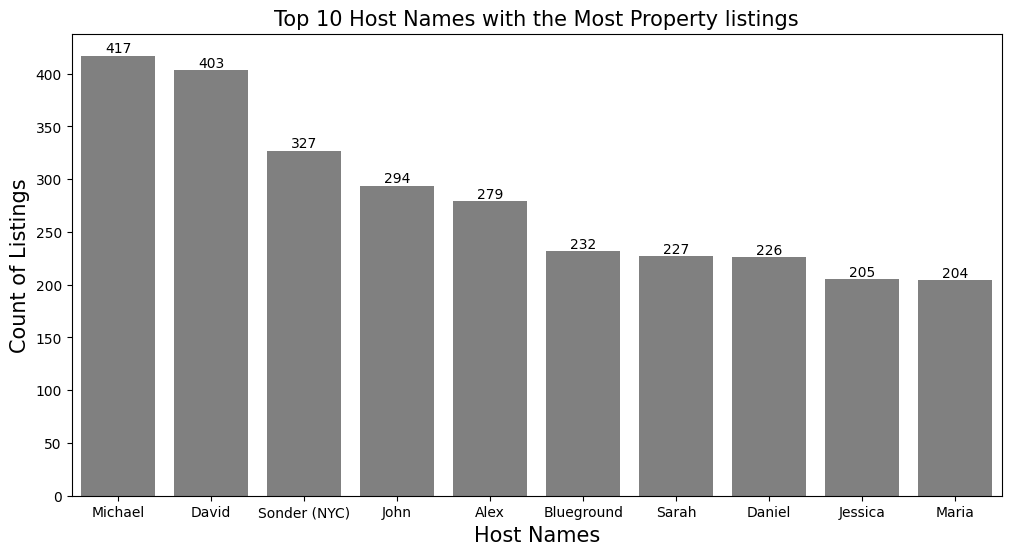

In [180]:
# Plotting the bar graph to visualize the top 10 host names with the highest number of listings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=data['host_name'].value_counts().iloc[:10].index, y=data['host_name'].value_counts().iloc[:10].values, color="gray")

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Top 10 Host Names with the Most Property listings", fontsize=15)
plt.xlabel("Host Names", fontsize=15)
plt.ylabel("Count of Listings", fontsize=15)
plt.show()

#### Que4: What are the property listing counts for each neighborhood group?

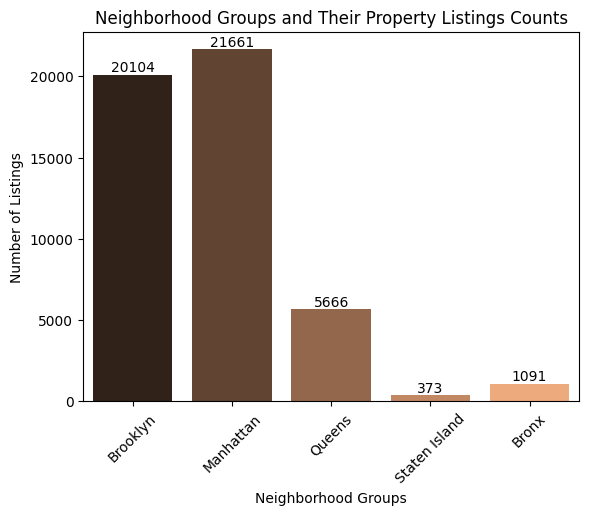

In [181]:
listings_per_neighborhood_group = sns.countplot(x='neighbourhood_group', data=data, palette="copper")

for bars in listings_per_neighborhood_group.containers:
    listings_per_neighborhood_group.bar_label(bars)

plt.title("Neighborhood Groups and Their Property Listings Counts")
plt.xlabel("Neighborhood Groups")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

### **Analysis of "Price" column**

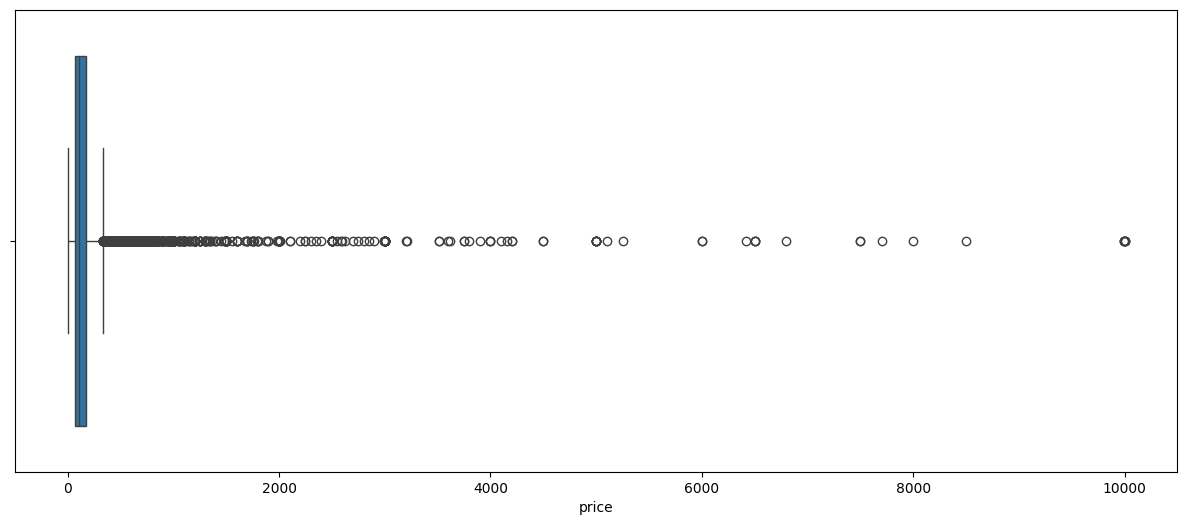

In [182]:
# Checking for outliers
plt.figure(figsize = (15,6))
sns.boxplot(x = data['price'])
plt.show()

In [183]:
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

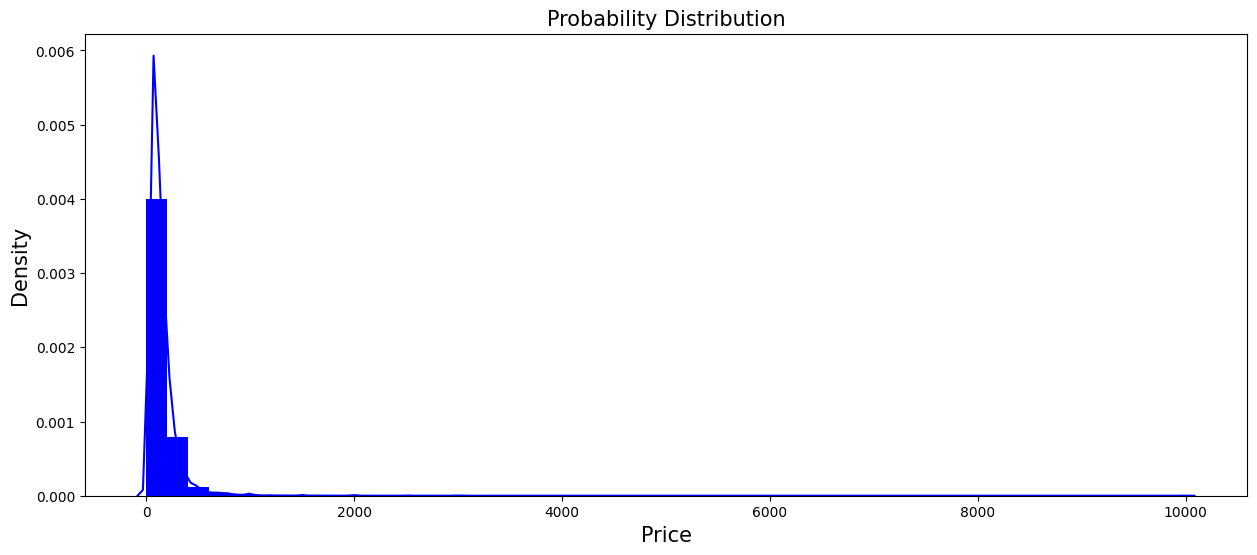

In [184]:
# Distribution
plt.figure(figsize = (15,6))
sns.distplot(df['price'], color = 'blue', hist_kws={"linewidth": 15,'alpha':1})
plt.title("Probability Distribution", fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

#### Handling outliers

In [185]:
Q1 = np.percentile(data['price'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['price'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

print('The IQR is',IQR)
print('The Minimum value is', (Q3 - (1.5* (IQR))))
print('The maximum value is', (Q3 + (1.5* (IQR))))

The IQR is 106.0
The Minimum value is 16.0
The maximum value is 334.0


##### Since mean > median, the data is likely right-skewed

In [186]:
mean = np.mean(data['price'])
print(mean)

152.7206871868289


In [187]:
median= np.median(data['price'])
print(median)

106.0


In [188]:
data_within_fences = df[df['price'] < 334 ]
data_within_fences.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [189]:
data_within_fences.groupby(['neighbourhood_group'])['price'].describe().T

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1070.000000,19415.000000,19501.000000,5567.000000,365.000000
mean,77.365421,105.699614,145.904620,88.904437,89.235616
std,47.110940,60.937808,70.417743,53.536041,57.700147
min,0.000000,0.000000,0.000000,10.000000,13.000000
25%,45.000000,60.000000,90.000000,50.000000,50.000000
50%,65.000000,90.000000,135.000000,74.000000,75.000000
75%,95.000000,140.000000,199.000000,108.000000,105.000000
max,325.000000,333.000000,333.000000,325.000000,300.000000


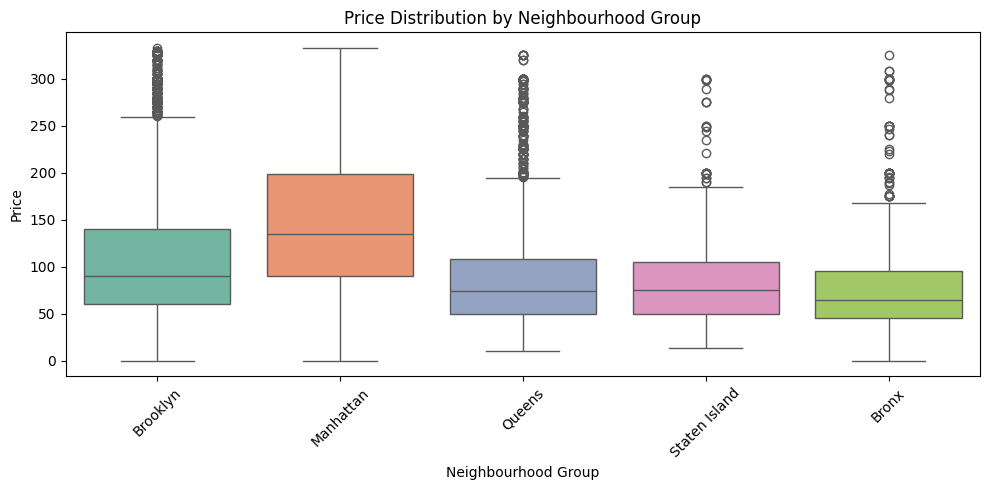

In [190]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_within_fences, x='neighbourhood_group', y='price', palette='Set2')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Bronx')

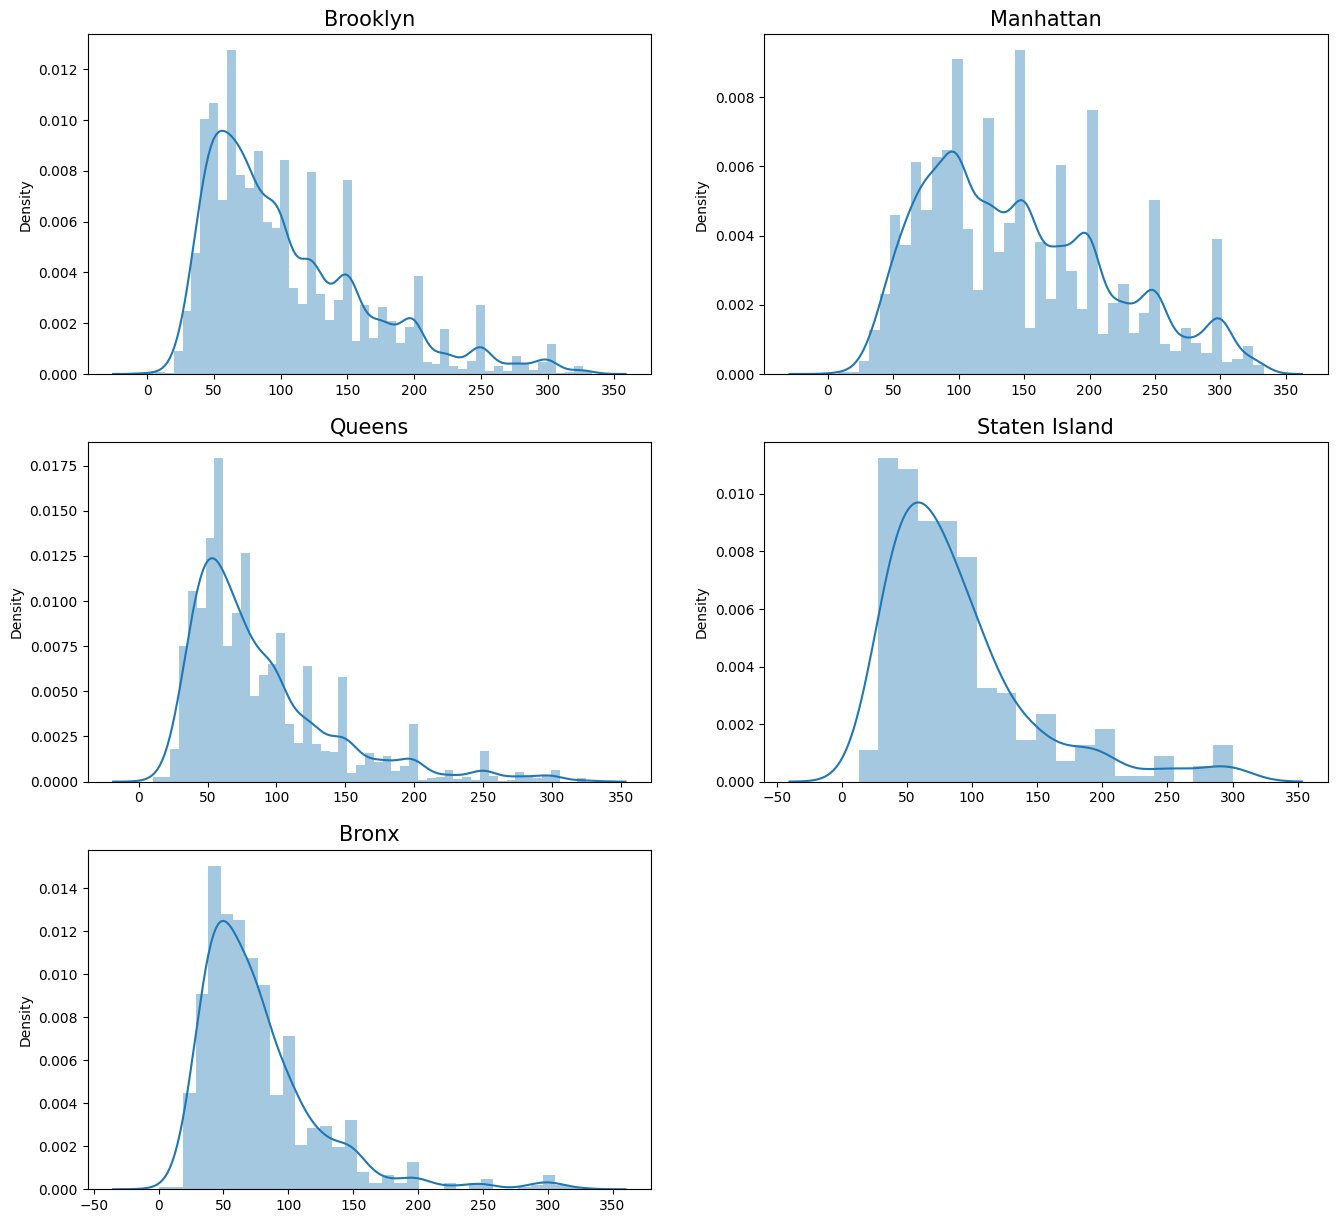

In [191]:
plt.figure(figsize = (16,15))

plt.subplot(3,2,1)
n1 = data_within_fences[data_within_fences['neighbourhood_group'] == 'Brooklyn']
sns.distplot(x = n1['price'])
plt.title("Brooklyn", fontsize = 15)

plt.subplot(3,2,2)
n2 = data_within_fences[data_within_fences['neighbourhood_group'] == 'Manhattan']
sns.distplot(x = n2['price'])
plt.title("Manhattan", fontsize = 15)

plt.subplot(3,2,3)
n3 = data_within_fences[data_within_fences['neighbourhood_group'] == 'Queens']
sns.distplot(x = n3['price'])
plt.title("Queens", fontsize = 15)

plt.subplot(3,2,4)
n4 = data_within_fences[data_within_fences['neighbourhood_group'] == 'Staten Island']
sns.distplot(x = n4['price'])
plt.title("Staten Island", fontsize = 15)

plt.subplot(3,2,5)
n5 = data_within_fences[data_within_fences['neighbourhood_group'] == 'Bronx']
sns.distplot(x = n5['price'])
plt.title("Bronx", fontsize = 15)

#### Que5: Which neighborhoods belong to each neighborhood group?

In [192]:
neighborhoods_by_group = data.groupby('neighbourhood_group')['neighbourhood'].unique()
print(neighborhoods_by_group)

neighbourhood_group
Bronx            [Highbridge, Clason Point, Eastchester, Kingsb...
Brooklyn         [Kensington, Clinton Hill, Bedford-Stuyvesant,...
Manhattan        [Midtown, Harlem, East Harlem, Murray Hill, He...
Queens           [Long Island City, Woodside, Flushing, Sunnysi...
Staten Island    [St. George, Tompkinsville, Emerson Hill, Shor...
Name: neighbourhood, dtype: object


#### Que6: What are the different types of rooms available in the dataset?

In [193]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Que7: Which room type contributes to the highest number of listings in Airbnb NYC?

In [194]:
data['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

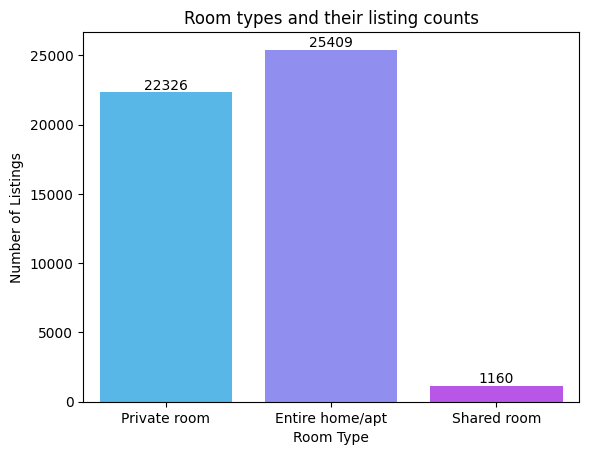

In [195]:
room_type_listings = sns.countplot(x='room_type', data=data, palette="cool")

for bars in room_type_listings.containers:
    room_type_listings.bar_label(bars)

plt.title("Room types and their listing counts")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

#### Que8: What is the Average price for all listings?

In [196]:
average_price = data['price'].mean()
print("Average price for all listings:", average_price)

Average price for all listings: 152.7206871868289


#### Que9: How many hosts have more than one listing?

In [197]:
hosts_listings = data['host_id'].value_counts()
hosts_multiple_listing = (hosts_listings > 1).sum()
print("Number of hosts with more than one listing:", hosts_multiple_listing)

Number of hosts with more than one listing: 5154


#### Que10: Which neighborhood has the highest average price?

In [198]:
highest_avg_price_neighborhood = data.groupby('neighbourhood')['price'].mean().idxmax()
highest_avg_price = data.groupby('neighbourhood')['price'].mean().max()
highest_avg_price_neighborhood, highest_avg_price

('Fort Wadsworth', np.float64(800.0))

#### Que11: How many listings are available throughout the entire year?

In [199]:
listings_available_all_year = data[data['availability_365'] == 365]
listings_365 = listings_available_all_year.shape[0]
print("Number of listings available throughout the entire year:", listings_365)

Number of listings available throughout the entire year: 1295


#### Que12: What is the average minimum number of nights required for a stay?

In [200]:
avg_minimum_nights = data['minimum_nights'].mean()
print("Average minimum nights required for a stay is:", avg_minimum_nights)

Average minimum nights required for a stay is: 7.029962163820431


#### Que13: How many listings have never been reviewed?

In [201]:
listings_never_reviewed = data[data['number_of_reviews'] == 0]
zero_reviews_count = listings_never_reviewed.shape[0]
zero_reviews_count

10052

#### Que14: What is the average number of listings per host?

In [202]:
total_listings = data.shape[0]
unique_hosts = data['host_id'].nunique()

average_listings_per_host = total_listings / unique_hosts

print("Average Listings per host: ", average_listings_per_host)

Average Listings per host:  1.3053634834610353


#### Que15: How many listings are there per neighborhood group by room type?

In [203]:
listings_per_neighborhood_group_by_room_type = data.groupby('neighbourhood_group')['room_type'].value_counts()
listings_per_neighborhood_group_by_room_type

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: count, dtype: int64

#### Que16: What are the top 10 most reviewed listings?

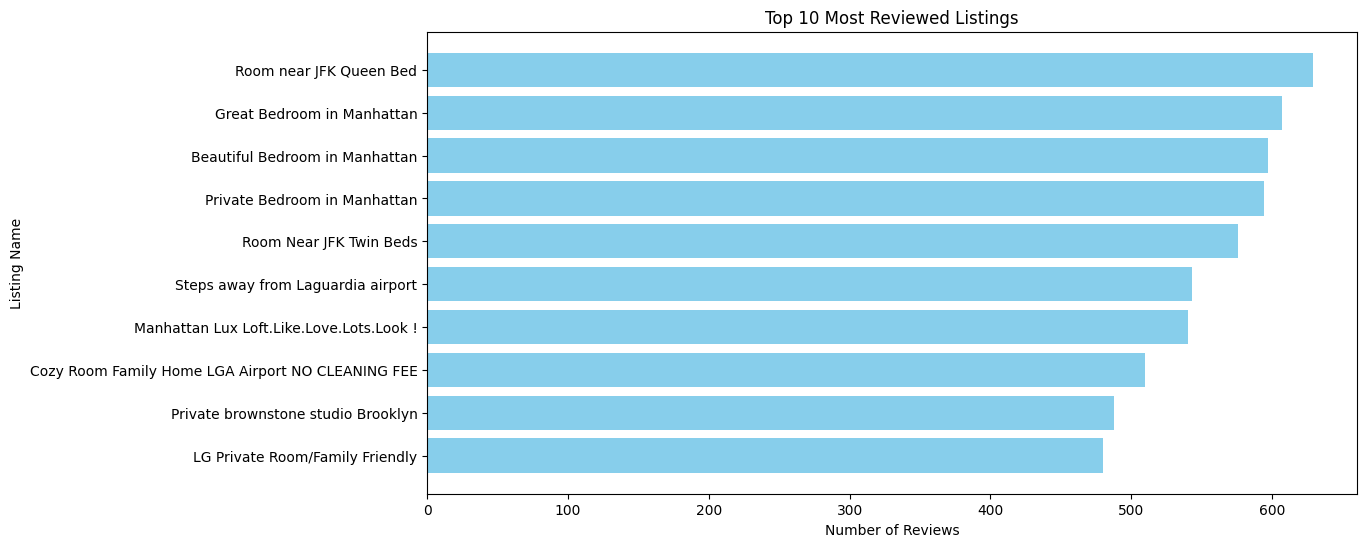

In [205]:
top_10_most_reviewed_listings = data.sort_values('number_of_reviews', ascending=False).head(10)
top_10_most_reviewed_listings[['name', 'number_of_reviews', 'neighbourhood_group', 'price']]
plt.figure(figsize=(12, 6))
ax = plt.barh(top_10_most_reviewed_listings['name'], top_10_most_reviewed_listings['number_of_reviews'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Listing Name')
plt.title('Top 10 Most Reviewed Listings')
plt.gca().invert_yaxis()
plt.show()

#### Que17: What is the average price for listings with availability of less than 100 days?

In [207]:
listings_available_lessthan100_days = data[data['availability_365']<100]
listings_available_lessthan100_days['price'].mean()

np.float64(138.74156660949114)